<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/BAN6440%20MODULE%203%20LINEAR%20REGRESSION%20ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#Import Libraries
import nltk
# Download necessary data for tokenization
nltk.download('punkt_tab')
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import unittest

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
#Load Dataset
file_path = '/content/spam_Emails_data.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())

  label                                               text
0  Spam  viiiiiiagraaaa\nonly for the ones that want to...
1   Ham  got ice thought look az original message ice o...
2  Spam  yo ur wom an ne eds an escapenumber in ch ma n...
3  Spam  start increasing your odds of success & live s...
4   Ham  author jra date escapenumber escapenumber esca...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23726 entries, 0 to 23725
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   23726 non-null  object
 1   text    23726 non-null  object
dtypes: object(2)
memory usage: 370.8+ KB
None


In [22]:
#Convert Labels to Binary
df['label'] = df['label'].map({'spam': 1, 'ham': 0})
# Print some info to check the DataFrame
print(df.head())
print(df.info())
print(df['label'].value_counts()) # Check the distribution of labels



   label                                               text
0      1  viiiiiiagraaaa\nonly for the ones that want to...
1      0  got ice thought look az original message ice o...
2      1  yo ur wom an ne eds an escapenumber in ch ma n...
3      1  start increasing your odds of success & live s...
4      0  author jra date escapenumber escapenumber esca...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23726 entries, 0 to 23725
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   23726 non-null  int64 
 1   text    23726 non-null  object
dtypes: int64(1), object(1)
memory usage: 370.8+ KB
None
label
0    12563
1    11163
Name: count, dtype: int64


In [23]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [24]:
# Handle missing values (you can modify the strategy)
df.fillna(method='ffill', inplace=True)

<ipython-input-24-31291186d4b1>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [25]:
# Convert all text columns to lowercase (optional)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower()

In [26]:
df.shape

(23726, 2)

In [27]:
X = df['text']
Y = df['label']

In [28]:
print(X)

0        viiiiiiagraaaa\nonly for the ones that want to...
1        got ice thought look az original message ice o...
2        yo ur wom an ne eds an escapenumber in ch ma n...
3        start increasing your odds of success & live s...
4        author jra date escapenumber escapenumber esca...
                               ...                        
23721    easy erection long lasting effects no prescrip...
23722    warning new online digial store lowest prices ...
23723                           miss tana eta thanks griff
23724    follow proposal first green tag offerings orig...
23725    commit a snapshot of the generated prototype h...
Name: text, Length: 23726, dtype: object


In [29]:
print(Y)

0        1
1        0
2        1
3        1
4        0
        ..
23721    1
23722    1
23723    0
23724    0
23725    0
Name: label, Length: 23726, dtype: int64


In [30]:
#Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [31]:
# Print shapes to check the split
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(23726,)
(18980,)
(4746,)


In [32]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(23726,)
(18980,)
(4746,)


In [33]:
#Feature Extraction using TF-IDF
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [18]:
Y_train = pd.to_numeric(Y_train, errors='coerce').fillna(0).astype(int)
Y_test = pd.to_numeric(Y_test, errors='coerce').fillna(0).astype(int)

In [34]:
print(X_train)

7649     hello everybody this is probably a classic but...
5287     company called glencorp interested acquiring e...
22776     bitter after being snubbed for membership in ...
22698    please see the attached invitation to the dlc ...
16897    compare coursing dualities electrophoresis mar...
                               ...                        
6400     laura thanks for taking care of this keep us p...
15288    hi vince ,\nit was good to speak to you and gr...
11513     ci ialis softabs is better than pfizer viiagr...
1688     invited attend monitor live via webcast cafcp ...
5994     march escapenumber escapenumber escapenumber e...
Name: text, Length: 18980, dtype: object


In [35]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1901434 stored elements and shape (18980, 193417)>
  Coords	Values
  (0, 76184)	0.09518876444893781
  (0, 61370)	0.13283346472729327
  (0, 123679)	0.09678799517673052
  (0, 37381)	0.1391547448146323
  (0, 18997)	0.10157014938384708
  (0, 98532)	0.2413953284117349
  (0, 95624)	0.19618544698740417
  (0, 72002)	0.13101961057527178
  (0, 137651)	0.09824250813664337
  (0, 131721)	0.1452448966199357
  (0, 20502)	0.12967011453144067
  (0, 139076)	0.11942538557044138
  (0, 116559)	0.27262655874727176
  (0, 108782)	0.11259083731672011
  (0, 120724)	0.3895028813536223
  (0, 167068)	0.09268995922480351
  (0, 50655)	0.10202431301486083
  (0, 135480)	0.07866761503313327
  (0, 76212)	0.19572693730274526
  (0, 20695)	0.13653639566570772
  (0, 117144)	0.11525592004238473
  (0, 103517)	0.11542520998451998
  (0, 86874)	0.19081760810552806
  (0, 78876)	0.08791304927373596
  (0, 87139)	0.140190828616697
  :	:
  (18979, 122597)	0.065185118381513

In [48]:
#Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_features, Y_train)

LinearRegression()

In [72]:
#Model Evaluation
Y_pred_linear = np.round(model.predict(X_test_features)) # Use 'model' and 'X_test_features'
print("Linear Regression MSE:", mean_squared_error(Y_test, model.predict(X_test_features))) # Use 'model' and 'X_test_features'
print("Linear Regression Accuracy:", accuracy_score(Y_test, Y_pred_linear))
print(classification_report(Y_test, Y_pred_linear))

Linear Regression MSE: 0.18128741333288279
Linear Regression Accuracy: 0.8209018120522545
              precision    recall  f1-score   support

        -7.0       0.00      0.00      0.00         0
        -2.0       0.00      0.00      0.00         0
        -1.0       0.00      0.00      0.00         0
         0.0       0.92      0.77      0.84      2494
         1.0       0.83      0.88      0.86      2252
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0
         5.0       0.00      0.00      0.00         0

    accuracy                           0.82      4746
   macro avg       0.19      0.18      0.19      4746
weighted avg       0.88      0.82      0.85      4746



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
#Model Evaluation
prediction_on_training_data = model.predict(X_train_features)
# Convert predictions to binary using a threshold (e.g., 0.5)
prediction_on_training_data_binary = (prediction_on_training_data >= 0.5).astype(int)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data_binary)

In [74]:
print('Acc on training data:', accuracy_on_training_data)

Acc on training data: 1.0


In [75]:
#Unit Testing Class
class TestSpamClassifier(unittest.TestCase):
    def setUp(self):
        self.model = model
        self.sample_spam = ['Congratulation! You have won a lottery of $1,000, 000']
        self.sample_ham = ["Hello, let's meet for coffee tomorrow."]

    def test_spam_prediction(self):
        spam_features = feature_extraction.transform(self.sample_spam)
        prediction = self.model.predict(spam_features)
        self.assertEqual(prediction[0], 1, "Spam prediction is incorrect")

    def test_ham_prediction(self):
        ham_features = feature_extraction.transform(self.sample_ham)
        prediction = self.model.predict(ham_features)
        self.assertEqual(prediction[0], 0, "Ham prediction is incorrect")

if __name__ == '__main__':
    unittest.main(argv=[''], verbosity=2, exit=False)


test_ham_prediction (__main__.TestLinearRegression.test_ham_prediction) ... FAIL
test_spam_prediction (__main__.TestLinearRegression.test_spam_prediction) ... FAIL
test_ham_prediction (__main__.TestSpamClassifier.test_ham_prediction) ... FAIL
test_spam_prediction (__main__.TestSpamClassifier.test_spam_prediction) ... FAIL

FAIL: test_ham_prediction (__main__.TestLinearRegression.test_ham_prediction)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-67-521f39e618cf>", line 16, in test_ham_prediction
    self.assertEqual(prediction[0], 0, "Ham prediction is incorrect")
AssertionError: np.float64(0.42196685007543133) != 0 : Ham prediction is incorrect

FAIL: test_spam_prediction (__main__.TestLinearRegression.test_spam_prediction)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-67-521f39e618cf>", line 11, in test_spam_prediction
  

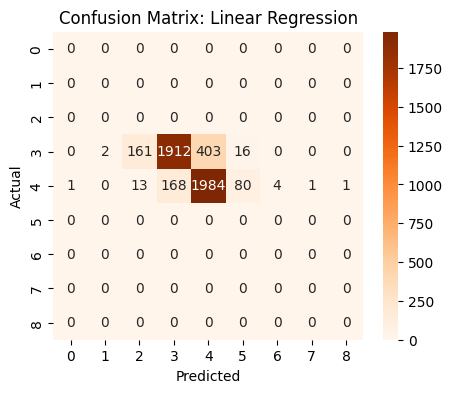

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Linear Regression
cm_lin = confusion_matrix(Y_test, Y_pred_linear)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lin, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix: Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()